In [1]:
# Install Statsmodels
# Adapted from https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
!pip install -q statsmodels

# Load packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load dataset
data = sm.datasets.get_rdataset('dietox', 'geepack').data

# Run LMER
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0372    
Min. group size:   11       Log-Likelihood:      -2217.0475
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.550 28.603 0.000 14.660 16.817
Time              6.939    0.080 86.925 0.000  6.783  7.095
Group Var        19.503    1.561                           
Group x Time Cov  0.294    0.153                           
Time Var          0.416    0.033                           



In [2]:
# Install R and Rpy2
!pip install rbase
!pip install -q rpy2

# Install LMER packages (THIS TAKES ABOUT 3~5 minutes)
packnames = ('lme4', 'lmerTest', 'emmeans', "geepack")
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector
utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages(StrVector(packnames))

R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.1/lme4_1.1-27.1.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 5355966 bytes (5.1 MB)

R[write to console]: downloaded 5.1 MB


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.1/lmerTest_3.1-3.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 530551 bytes (518 KB)

R[write to console]: downloaded 518 KB


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.1/emmeans_1.7.1-1.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2001350 bytes (1.9 MB)

R[write to console]: downloaded 1.9 MB


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.1/geepack_1.3-2.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 1205314 bytes (1.1 MB)

R[write to console]: downloaded 1.1

package 'lme4' successfully unpacked and MD5 sums checked
package 'lmerTest' successfully unpacked and MD5 sums checked
package 'emmeans' successfully unpacked and MD5 sums checked
package 'geepack' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lingyi\AppData\Local\Temp\Rtmp8MxiJR\downloaded_packages


<rpy2.rinterface_lib.sexp.NULLType object at 0x000001997D82B600> [RTYPES.NILSXP]

In [3]:
%load_ext rpy2.ipython

D:\Lingyi\Mysoftware\Anaconda3\envs\pytorch\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [4]:
%%R 
# load LMER libraries
library(lme4)
library(lmerTest)
# load dataset in R
data(dietox, package='geepack')
# LMER model in R
m<-lmer('Weight ~ Time + (1+Time|Pig)', data=dietox)
print(summary(m))

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: 'lmerTest'


R[write to console]: The following object is masked from 'package:lme4':

    lmer


R[write to console]: The following object is masked from 'package:stats':

    step




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: "Weight ~ Time + (1+Time|Pig)"
   Data: dietox

REML criterion at convergence: 4434.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4286 -0.5529 -0.0416  0.4841  3.5624 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Pig      (Intercept) 19.4929  4.415        
          Time         0.4161  0.645    0.10
 Residual              6.0375  2.457        
Number of obs: 861, groups:  Pig, 72

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 15.73865    0.55012 71.03978   28.61   <2e-16 ***
Time         6.93901    0.07983 71.06517   86.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
     (Intr)
Time 0.005 


In [5]:
%%R -i data -o betas
# Load data from Python into R
m<-lmer('Weight ~ Time + (1|Pig)', data=data)
print(summary(m))
betas <- fixef(m)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: "Weight ~ Time + (1|Pig)"
   Data: data

REML criterion at convergence: 4809.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7118 -0.5696 -0.0943  0.4877  4.7732 

Random effects:
 Groups   Name        Variance Std.Dev.
 Pig      (Intercept) 40.39    6.356   
 Residual             11.37    3.371   
Number of obs: 861, groups:  Pig, 72

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  15.72352    0.78805  83.00293   19.95   <2e-16 ***
Time          6.94251    0.03339 788.03850  207.94   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
     (Intr)
Time -0.275


In [6]:
betas

array([15.72352307,  6.94250501])

In [7]:
%%R -i data
# Specify Evit as a factor and set a polynomial contrast.
data$Evit <- as.factor(data$Evit)
contrasts(data$Evit) <- contr.poly 
m<-lmer('Weight ~ Time * Evit + (1|Pig)', data=data)
print(summary(m))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: "Weight ~ Time * Evit + (1|Pig)"
   Data: data

REML criterion at convergence: 4796.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9037 -0.5661 -0.0972  0.4843  5.0245 

Random effects:
 Groups   Name        Variance Std.Dev.
 Pig      (Intercept) 39.73    6.304   
 Residual             11.21    3.347   
Number of obs: 861, groups:  Pig, 72

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  15.72208    0.78212  80.68619  20.102  < 2e-16 ***
Time          6.94538    0.03316 786.03373 209.422  < 2e-16 ***
Evit.L       -0.02168    1.35495  80.65930  -0.016  0.98727    
Evit.Q       -1.04967    1.35440  80.71312  -0.775  0.44060    
Time:Evit.L  -0.12420    0.05732 786.01871  -2.167  0.03054 *  
Time:Evit.Q  -0.16742    0.05757 786.04862  -2.908  0.00374 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation

In [8]:
%%R -i data
data$Evit <- as.factor(data$Evit)
m<-lmer('Weight ~ Time * relevel(Evit, ref="Evit100") + (1|Pig)', data=data)
print(summary(m))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: "Weight ~ Time * relevel(Evit, ref=\"Evit100\") + (1|Pig)"
   Data: data

REML criterion at convergence: 4793.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9037 -0.5661 -0.0972  0.4843  5.0245 

Random effects:
 Groups   Name        Variance Std.Dev.
 Pig      (Intercept) 39.73    6.304   
 Residual             11.21    3.347   
Number of obs: 861, groups:  Pig, 72

Fixed effects:
                                            Estimate Std. Error        df
(Intercept)                                 16.57914    1.35412  80.74008
Time                                         7.08207    0.05770 786.06338
relevel(Evit, ref = "Evit100")Evit000       -1.27025    1.93539  80.68667
relevel(Evit, ref = "Evit100")Evit200       -1.30091    1.89561  80.71319
Time:relevel(Evit, ref = "Evit100")Evit000  -0.11722    0.08207 786.03367
Time:relevel(Evit, ref = "Evit100")Evit200  -0.29287    0

In [9]:
"""pymer4 is down due to recent updates in rpy2. 
It's necessary to install via source until this issue is resolved. 
"""
!git clone https://github.com/ejolly/pymer4.git
!cd pymer4 && git pull origin dev && git checkout dev && pip install -q .

fatal: destination path 'pymer4' already exists and is not an empty directory.


Already up to date.
Your branch is up to date with 'origin/dev'.


From https://github.com/ejolly/pymer4
 * branch            dev        -> FETCH_HEAD
Already on 'dev'
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


Formula: Weight~Time+Evit+(1+Time|Pig)

Family: gaussian	 Inference: parametric

Number of observations: 861	 Groups: {'Pig': 72.0}

Log-likelihood: -2214.080 	 AIC: 4428.160

Random effects:

                 Name     Var    Std
Pig       (Intercept)  19.701  4.439
Pig              Time   0.416  0.645
Residual                6.037  2.457

             IV1   IV2   Corr
Pig  (Intercept)  Time  0.081

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),15.311,13.395,17.227,0.978,68.986,15.661,0.000,***
Time,6.939,6.782,7.095,0.080,71.060,86.917,0.000,***
EvitEvit100,1.340,-1.342,4.022,1.368,69.037,0.979,0.331,
EvitEvit200,-0.055,-2.710,2.601,1.355,69.008,-0.040,0.968,


SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Using original model contrasts, orthogonality not guaranteed)


,SS,MS,NumDF,DenomDF,F-stat,P-val,Sig
0,45609.788238,45609.788238,1,71.059997,7554.585993,6.722538e-74,***
1,8.232615,4.116307,2,69.037095,0.681805,5.090753e-01,


<AxesSubplot:xlabel='Estimate'>

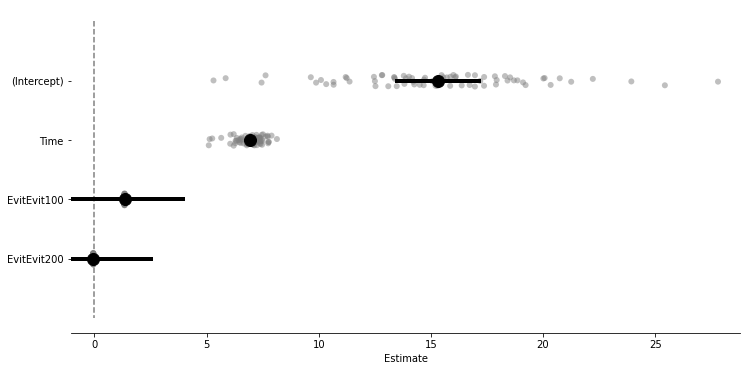

In [10]:
# Install pymer4
!pip install -q pymer4
# load pymer4
from pymer4.models import Lmer
model = Lmer('Weight ~ Time + Evit + (1 + Time|Pig)', data=data)
display(model.fit())
# ANOVA results from fitted model
display(model.anova())
# Plot estimated model coefficients 
model.plot_summary()

In [11]:
import numpy as np
import pandas as pd

In [12]:
data= pd.read_csv("new_pullreq.csv")
data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,...,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,...,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,...,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,...,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,...,0,0,0,0,2.0,0,0.010753,0,2414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347932,3347933,30544060,Kronos-Integration,kronos-service-consul,1,9,9.0,1,0,0,...,0,0,0,0,2537.0,0,0.696970,0,9,0
3347933,3347934,1142,saltstack,salt,0,1165,NaN,1,10,0,...,0,1,0,0,42.0,0,0.056849,0,1165,0
3347934,3347935,31499094,mjmlio,mjml,1,8834,8834.0,2,6,0,...,0,8,0,0,597.0,0,0.002041,0,8834,0
3347935,3347936,55317,zotonic,zotonic,0,703,NaN,7,15,0,...,0,0,0,0,10.0,0,0.000732,0,703,0


In [13]:
data=data.head(80000)
data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,...,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,...,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,...,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,...,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,...,0,0,0,0,2.0,0,0.010753,0,2414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,3981,liferay,liferay-portal,0,9920,NaN,3,0,202,...,0,0,0,0,913.0,0,0.000036,0,9920,0
79996,79997,3005855,biolab,orange3,0,143719,NaN,20,636,188,...,0,0,0,0,121.0,0,0.034359,0,143719,0
79997,79998,30884497,comindware,core-ui,1,1295,1295.0,2,73,0,...,0,0,0,0,27.0,0,0.299270,0,1295,0
79998,79999,147172,recurly,recurly-client-ruby,0,1110,NaN,1,8,17,...,0,0,0,0,3750.0,0,0.105114,0,1110,0


In [14]:
display(data.head(100))
display(data.dtypes)

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,...,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,...,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,...,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,...,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,...,0,0,0,0,2.0,0,0.010753,0,2414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,17090138,crossroads,admin.goodcity,1,5609,5609.0,2,4,0,...,0,0,0,0,2232.0,0,0.237930,0,5609,0
96,97,22213367,project-ncl,repour,1,48905,48905.0,2,78,0,...,0,2,0,0,10807.0,0,0.356383,0,48905,0
97,98,42709,cdk,cdk,0,252,NaN,1,0,3,...,0,0,0,0,3.0,0,0.212546,0,252,0
98,99,89564024,openlattice,conductor-client,1,1056,1056.0,31,6680,0,...,0,0,0,0,131.0,0,0.100932,0,1056,0


id                       int64
project_id               int64
ownername               object
reponame                object
merged_or_not            int64
                        ...   
friday_effect            int64
contrib_rate_author    float64
reopen_or_not            int64
first_close_minutes      int64
reopen_num               int64
Length: 118, dtype: object

In [15]:
#display characters
i=0
for col in data.columns:
    print(i,col)
    i+=1

0 id
1 project_id
2 ownername
3 reponame
4 merged_or_not
5 lifetime_minutes
6 mergetime_minutes
7 num_commits
8 src_churn
9 test_churn
10 files_added
11 files_deleted
12 files_modified
13 files_changed
14 src_files
15 doc_files
16 other_files
17 num_commit_comments
18 num_issue_comments
19 num_comments
20 num_participants
21 sloc
22 team_size
23 perc_external_contribs
24 commits_on_files_touched
25 test_lines_per_kloc
26 test_cases_per_kloc
27 asserts_per_kloc
28 watchers
29 prev_pullreqs
30 requester_succ_rate
31 followers
32 churn_addition
33 churn_deletion
34 pr_comment_num
35 comment_num
36 perc_neg_emotion
37 perc_pos_emotion
38 perc_neu_emotion
39 part_num_issue
40 part_num_commit
41 part_num_pr
42 part_num_code
43 comment_conflict
44 hash_tag
45 at_tag
46 test_inclusion
47 description_length
48 bug_fix
49 ci_exists
50 ci_latency
51 ci_build_num
52 ci_test_passed
53 ci_failed_perc
54 ci_first_build_status
55 ci_last_build_status
56 language
57 fork_num
58 project_age
59 open_issu

In [16]:
project_id = data[['project_id']]
# #jj test
first_pr = data[['first_pr']]
#object
merged_or_not = data[['merged_or_not']]

#size of change
churn_addition = data[['churn_addition']]
churn_deletion = data[['churn_deletion']]

#Complexity
description_length = data[['description_length']]

#nature of pull request
bug_fix = data[['bug_fix']]

#test inclusion
test_inclusion = data[['test_inclusion']]

#reference of a contributor,issue or pr
hash_tag = data[['hash_tag']]
at_tag = data[['at_tag']]

#Conflict
comment_conflict = data[['comment_conflict']]

#Hotness or Relevance
pr_comment_num = data[['pr_comment_num']]
part_num_issue = data[['part_num_issue']]
part_num_commit = data[['part_num_commit']]
part_num_pr = data[['part_num_pr']]
part_num_code = data[['part_num_code']]

#Emotions
comment
perc_inte_neg_emo = data[['perc_inte_neg_emo']]
perc_inte_pos_emo = data[['perc_inte_pos_emo']]
perc_inte_neu_emo = data[['perc_inte_neu_emo']]

#Continuous Integration
ci_exists = data[['ci_exists']]
ci_latency = data[['ci_latency']]
ci_build_num = data[['ci_build_num']]
ci_test_passed = data[['ci_test_passed']]
ci_failed_perc = data[['ci_failed_perc']]
ci_first_build_status = data[['ci_first_build_status']]
ci_last_build_status = data[['ci_last_build_status']]

In [17]:
merged_or_not = data[['test_inclusion']]
print(churn_addition)
type(merged_or_not)

       churn_addition
0                   0
1                   0
2                   0
3                 110
4                  60
...               ...
79995             202
79996             483
79997              43
79998              25
79999               4

[80000 rows x 1 columns]


pandas.core.frame.DataFrame

In [35]:
type(data)

pandas.core.frame.DataFrame

In [36]:
type(project_id)

pandas.core.frame.DataFrame

In [232]:
df = data[['project_id','merged_or_not','churn_addition','churn_deletion','description_length','test_inclusion','hash_tag','at_tag','comment_conflict','pr_comment_num','part_num_issue','part_num_commit','part_num_pr','part_num_code','perc_inte_neg_emo','perc_inte_pos_emo','perc_inte_neu_emo','ci_exists','ci_latency','ci_build_num','ci_test_passed','ci_failed_perc']]
# print(type(df))
df.iloc[0]

project_id            13708387.0
merged_or_not                1.0
churn_addition               0.0
churn_deletion               0.0
description_length        4926.0
test_inclusion               0.0
hash_tag                     1.0
at_tag                       0.0
comment_conflict             0.0
pr_comment_num               0.0
part_num_issue               1.0
part_num_commit              0.0
part_num_pr                  0.0
part_num_code                0.0
perc_inte_neg_emo            0.0
perc_inte_pos_emo            0.0
perc_inte_neu_emo            1.0
ci_exists                    1.0
ci_latency                 274.0
ci_build_num                 1.0
ci_test_passed               1.0
ci_failed_perc               0.0
Name: 0, dtype: float64

In [312]:
#jj test 2.0
df = data[['project_id','merged_or_not','ci_latency']]
# print(type(df))
df.iloc[0]

project_id       13708387.0
merged_or_not           1.0
ci_latency            274.0
Name: 0, dtype: float64

In [18]:
#jj test 2.1
df = data [['project_id','merged_or_not','churn_addition','churn_deletion','description_length','test_inclusion','hash_tag','at_tag','comment_conflict','pr_comment_num','part_num_issue','part_num_commit','part_num_pr','part_num_code','perc_inte_neg_emo','perc_inte_pos_emo','perc_inte_neu_emo','ci_exists','ci_latency','ci_build_num','ci_test_passed','ci_failed_perc']]

In [150]:
model = [project_id,merged_or_not,churn_addition,churn_deletion,description_length,bug_fix,test_inclusion,hash_tag,at_tag,comment_conflict,pr_comment_num,part_num_issue,part_num_commit,part_num_pr,part_num_code,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status]


SyntaxError: invalid syntax (<ipython-input-150-d337dda9194b>, line 2)

In [40]:
model = Lmer('merged_or_not+churn_addition+churn_deletion+bug_fix+test_inclusion+hash_tag+at_tag+comment_conflict+pr_comment_num+part_num_issue+part_num_commit+part_num_pr+part_num_code+perc_inte_neg_emo+perc_inte_pos_emo+perc_inte_neu_emo+ci_exists+ci_latency+ci_build_num+ci_test_passed+ci_failed_perc+ci_first_build_status+ci_last_build_status+(1|project_id)',data=df)

NameError: name 'Lmer' is not defined

In [226]:
model = Lmer('merged_or_not+churn_addition+churn_deletion+test_inclusion+hash_tag+at_tag+comment_conflict+pr_comment_num+part_num_issue+part_num_commit+part_num_pr+part_num_code+perc_inte_neg_emo+perc_inte_pos_emo+perc_inte_neu_emo+ci_exists+ci_latency+ci_build_num+ci_test_passed+ci_failed_perc+(1|project_id)',data=df)


In [19]:
#jj test 3.1
model = Lmer('merged_or_not~churn_addition+churn_deletion+test_inclusion+hash_tag+at_tag+comment_conflict+pr_comment_num+part_num_issue+part_num_commit+part_num_pr+part_num_code+perc_inte_neg_emo+perc_inte_pos_emo+perc_inte_neu_emo+ci_exists+ci_latency+ci_build_num+ci_test_passed+ci_failed_perc+(1|project_id)',data=df)

In [20]:
# types = data.applymap(type).apply(set)
# types[types.apply(len) > 1]
display(model.fit())





**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: merged_or_not~churn_addition+churn_deletion+test_inclusion+hash_tag+at_tag+comment_conflict+pr_comment_num+part_num_issue+part_num_commit+part_num_pr+part_num_code+perc_inte_neg_emo+perc_inte_pos_emo+perc_inte_neu_emo+ci_exists+ci_latency+ci_build_num+ci_test_passed+ci_failed_perc+(1|project_id)

Family: gaussian	 Inference: parametric

Number of observations: 80000	 Groups: {'project_id': 5379.0}

Log-likelihood: -12852.674 	 AIC: 25705.348

Random effects:

                   Name    Var    Std
project_id  (Intercept)  0.021  0.143
Residual                 0.106  0.326

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.060,1.043,1.078,0.009,35379.853,117.529,0.000,***
churn_addition,0.000,-0.000,0.000,0.000,36756.718,0.478,0.632,
churn_deletion,-0.000,-0.000,0.000,0.000,36837.902,-0.766,0.444,
test_inclusion,0.017,0.008,0.026,0.005,36976.049,3.736,0.000,***
hash_tag,0.021,0.012,0.029,0.004,36978.473,4.847,0.000,***
at_tag,0.005,-0.005,0.015,0.005,36689.581,0.967,0.333,
comment_conflict,0.038,0.009,0.067,0.015,35527.245,2.561,0.010,*
pr_comment_num,0.000,-0.000,0.001,0.000,34398.172,0.737,0.461,
part_num_issue,-0.055,-0.059,-0.052,0.002,36976.638,-30.099,0.000,***
part_num_commit,-0.025,-0.066,0.015,0.021,35113.907,-1.222,0.222,


In [21]:
display(model.anova)

<bound method Lmer.anova of pymer4.models.Lmer(fitted = True, formula = merged_or_not~churn_addition+churn_deletion+test_inclusion+hash_tag+at_tag+comment_conflict+pr_comment_num+part_num_issue+part_num_commit+part_num_pr+part_num_code+perc_inte_neg_emo+perc_inte_pos_emo+perc_inte_neu_emo+ci_exists+ci_latency+ci_build_num+ci_test_passed+ci_failed_perc+(1|project_id), family = gaussian)>

<AxesSubplot:xlabel='Estimate'>

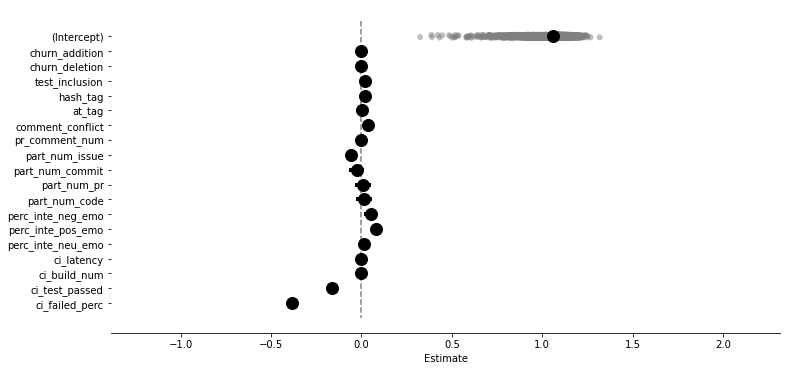

In [22]:
model.plot_summary()